# Applications of Convex Optimisation

In [7]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [221]:
%matplotlib inline
# mpl.rcParams['font.family'] = ['serif']
# mpl.rcParams['font.serif'] = ['Times New Roman']

## Subgradients

Text(0.5, 1.0, 'Various subgradients of f(x)=|x|')

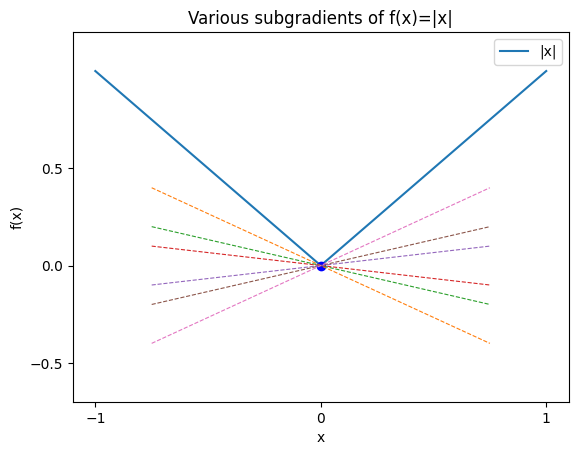

In [3]:
f = lambda x: np.abs(x)
x = np.linspace(-1,1,1000)
x1 = np.linspace(-0.75, 0.75, 1000)

g1 = lambda x: -0.4*x
g2 = lambda x: -0.2*x
g3 = lambda x: -0.1*x
g4 = lambda x: 0.1*x
g5 = lambda x: 0.2*x
g6 = lambda x: 0.4*x

plt.plot(x, f(x), label="|x|")
plt.plot(0,0, marker='o', color="blue")
plt.plot(x1, g1(x), ls="dashed", lw=0.8)
plt.plot(x1, g2(x), ls="dashed", lw=0.8)
plt.plot(x1, g3(x), ls="dashed", lw=0.8)
plt.plot(x1, g4(x), ls="dashed", lw=0.8)
plt.plot(x1, g5(x), ls="dashed", lw=0.8)
plt.plot(x1, g6(x), ls="dashed", lw=0.8)

plt.xlabel("x")
plt.ylabel("f(x)")

plt.legend()
plt.xticks(np.array([-1,0,1]))
plt.yticks(np.array([-0.5,0,0.5]))

plt.ylim(-0.7, 1.2)

plt.title("Various subgradients of f(x)=|x|")

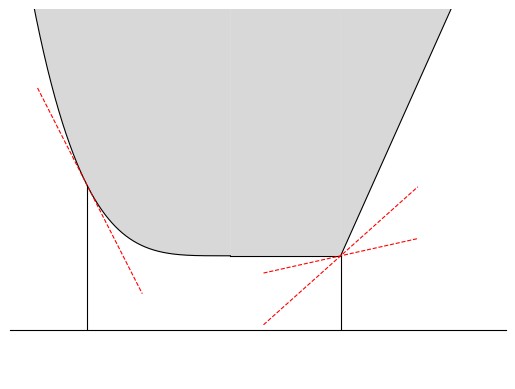

In [78]:
xleft = np.linspace(-2, 0, 1000)
xmiddle = np.linspace(0, 1, 1000)
xright = np.linspace(1, 4, 1000)


plt.plot(xleft, xleft**4, lw=0.8, color="black", label="f(x)")
plt.plot(xmiddle, np.zeros(1000), lw=0.8, color="black")
plt.plot(xright, (10*xright) -10, color="black", lw=0.8)

offset = 1.3
x1 = np.linspace(-1.75, -0.8, 1000)
plt.plot(x1, (x1+1.3)*(4*(-1.3)**3) - (-1.3**4), color="red", ls="dashed", lw=0.8)

x2 = np.linspace(0.3, 1.7, 1000)
plt.plot(x2, (x2-1)*(1), color="red", ls="dashed", lw=0.8)
plt.plot(x2, (x2-1)*(4), color="red", ls="dashed", lw=0.8)

plt.vlines(1, -3, 0, color="black", lw=0.8)
plt.vlines(-1.3, -3, 1.3**4, color="black", lw=0.8)

plt.ylim(-5, 10)
plt.xlim(-2, 2.5)

plt.fill_between(xleft, xleft**4, 16, alpha=0.3, label="Feasible Region", color="grey", lw=0.0)
plt.fill_between(xmiddle, np.zeros(1000), 16, alpha=0.3, label="Feasible Region", color="grey", lw=0.0)
plt.fill_between(xright, xright*10-10, 16, alpha=0.3, label="Feasible Region", color="grey", lw=0.0)

plt.xticks([])
plt.yticks([])

# Get the current axes
ax = plt.gca()

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the left spine invisible
ax.spines['left'].set_visible(False)

ax.spines['bottom'].set_position(('data', -3))


## Projected Gradient Descent

Say we have a 1-dimnsional example, with $f(x)=x^{2}$, and we bound on $x \in [-5, 5]$. Let's see what this looks like

In [4]:
f = lambda x: x**2
df = lambda x: 2*x

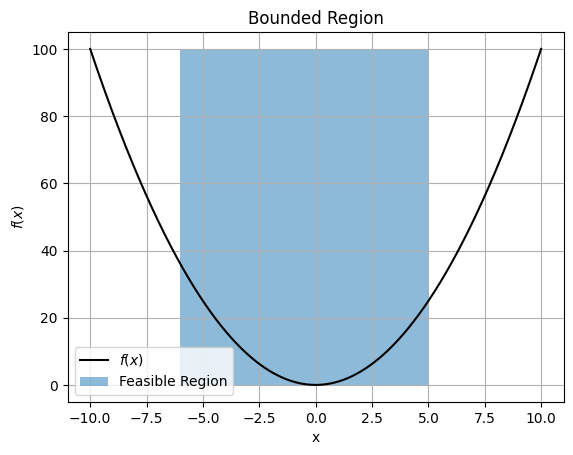

In [5]:
lim = 10
feas = 6

plt.plot(np.linspace(-lim, lim,1000), f(np.linspace(-lim,lim,1000)), color="black", label=r"$f(x)$")
plt.xlabel("x")
plt.ylabel(r"$f(x)$")
plt.title("Bounded Region")
plt.fill_between(range(-feas, feas), 0, max(f(np.linspace(-lim, lim,1000))), alpha=0.5, label="Feasible Region")
plt.grid()
plt.legend()

In [28]:
def proj_grad_desc(x1, grad, lr, feas=[-6, 6], tol=1e-5, max_iter=100):
    
    i = 0
    loss = np.inf
    vals = [x1]
    losses = []
    
    stop_crit = ""
    
    while i < max_iter and loss > tol:
        
        xtp1 = vals[-1]-lr*grad(vals[-1]) # I don't know how to calculate the subgradient
        
        #print(xtp1)
        
        if xtp1 < feas[0]:
            xtp1 = feas[0]
        elif xtp1 > feas[1]:
            xtp1 = feas[1]
        #print(xtp1)
        #print("\n")
        vals.append(xtp1)
        
        i += 1
        loss = np.abs(vals[-2]-vals[-1])
        losses.append(loss)
        
    if i >= max_iter:
        stop_crit = "max_iter"
    else:
        stop_crit = "loss"
        
    return {"Optimum": vals[-1],
           "StopCrit": stop_crit,
           "Steps": np.array(vals),
           "Loss": np.array(losses)}       

In [29]:
proj = proj_grad_desc(100, df, 0.1, feas=[-60, 60])

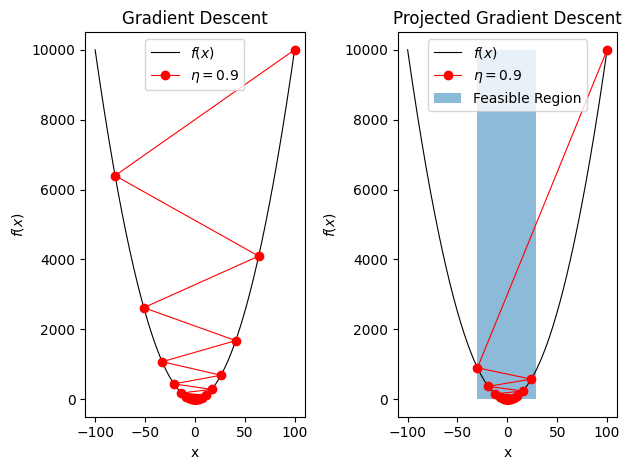

In [31]:
lim = 100
feas = [-30,30]
lr = 0.9
x1 = 100

fig, (ax1, ax2) = plt.subplots(1,2)

ax1.plot(np.linspace(-lim, lim,1000), f(np.linspace(-lim,lim,1000)), color="black", label=r"$f(x)$", lw=0.8)
ax1.plot(grad_desc(x1, df, lr)["Steps"], f(grad_desc(x1, df, lr)["Steps"]), color="red", marker='o', label=r'$\eta=0.9$', lw=0.8)
ax1.set(xlabel="x", ylabel=r"$f(x)$", title="Gradient Descent")
ax1.legend()


ax2.plot(np.linspace(-lim, lim, 1000), f(np.linspace(-lim, lim,1000)), color="black", label=r"$f(x)$", lw=0.8)
ax2.plot(proj_grad_desc(x1, df, lr, feas)["Steps"], f(proj_grad_desc(x1, df, lr, feas)["Steps"]), color="red", marker='o', label=r'$\eta=0.9$', lw=0.8)
ax2.fill_between(range(feas[0], feas[1]), 0, max(f(np.linspace(-lim, lim, 1000))), alpha=0.5, label="Feasible Region")

ax2.set(xlabel="x", ylabel=r"$f(x)$", title="Projected Gradient Descent")
ax2.legend()

fig.tight_layout()

#fig.savefig('PDG.png')

## Gradient Descent for Smooth Functions

In [4]:
f = lambda x: x**2
df = lambda x: 2*x

In [12]:
def grad_desc(x1, grad, lr, tol=1e-10, max_iter=100):
    i = 0
    loss = np.inf
    vals = [x1]
    losses = []
    
    stop_crit = ""
    
    while i < max_iter:# and loss > tol:
        
        vals.append(vals[-1]-lr*grad(vals[-1]))
        
        i += 1
        loss = np.abs(vals[-2]-vals[-1])
        losses.append(loss)
        
    if i >= max_iter:
        stop_crit = "max_iter"
    else:
        stop_crit = "loss"
        
    return {"Optimum": vals[-1],
           "StopCrit": stop_crit,
           "Steps": np.array(vals),
           "Loss": np.array(losses)}       
    
    

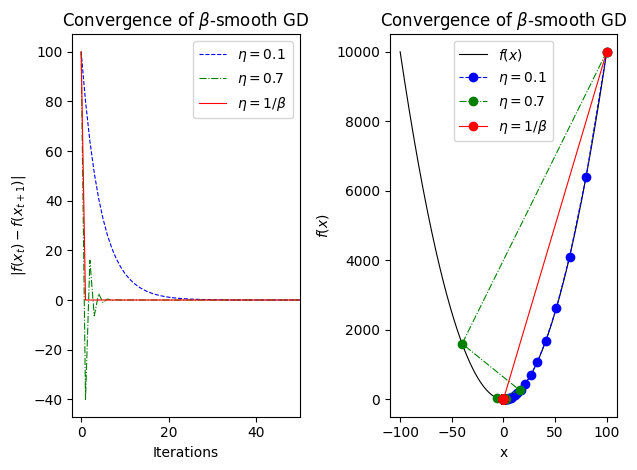

In [26]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.plot(grad_desc(100, df, 0.1)["Steps"], label=r'$\eta=0.1$', color="blue", lw=0.8, ls="--")
#ax1.plot(grad_desc(100, df, 0.05)["Steps"], label=r'$\eta=0.05$', color="orange")
ax1.plot(grad_desc(100, df, 0.7)["Steps"], label=r'$\eta=0.7$', color="green", lw=0.8, ls="-.")
ax1.plot(grad_desc(100, df, 0.5)["Steps"], label=r'$\eta=1/\beta$', color="red", lw=0.8)

ax1.set(xlabel="Iterations", ylabel=r"$|f(x_{t})-f(x_{t+1})|$", title=r"Convergence of $\beta$-smooth GD")
ax1.legend()
ax1.set_xlim(-2, 50)


ax2.plot(np.linspace(-100,100,1000), f(np.linspace(-100,100,1000)), color="black", label=r"$f(x)$", lw=0.8)
ax2.plot(grad_desc(100, df, 0.1)["Steps"], f(grad_desc(100, df, 0.1)["Steps"]), color="blue", marker='o', label=r'$\eta=0.1$', lw=0.8, ls="--")
ax2.plot(grad_desc(100, df, 0.7)["Steps"], f(grad_desc(100, df, 0.7)["Steps"]), color="green", marker='o', label=r'$\eta=0.7$', lw=0.8, ls="-.")
ax2.plot(grad_desc(100, df, 0.5)["Steps"], f(grad_desc(100, df, 0.5)["Steps"]), color="red", marker='o', label=r'$\eta=1/\beta$', lw=0.8)

ax2.set(xlabel="x", ylabel=r"$f(x)$", title=r"Convergence of $\beta$-smooth GD")
ax2.legend()

fig.tight_layout()

## Evaluate the improvement in one step of GD

$$f\left(x-(1/\beta\nabla f(x)\right)-f(x)\leq -(1/2\beta)\|\nabla f(x)\|^{2}$$

Let $$\eta = 1/\beta = 0.1$$. We have 

In [18]:
gd1 = grad_desc(100, df, 0.1)

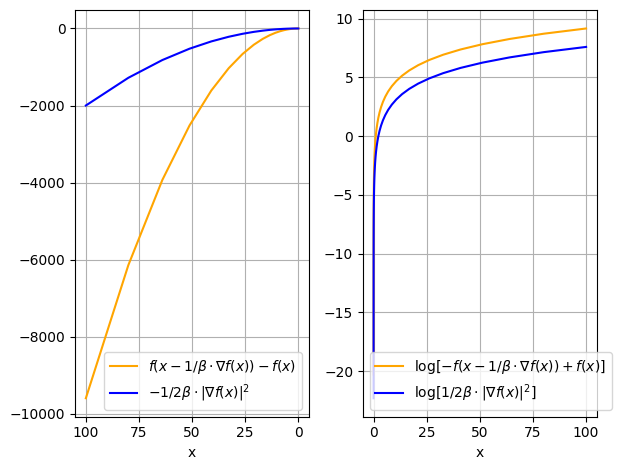

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.plot(gd1["Steps"][:-1], f(gd1["Loss"])-f(gd1["Steps"][:-1]), color="orange", label=r"$f(x-1/\beta\cdot \nabla f(x))-f(x)$")
ax1.plot(gd1["Steps"][:-1], (-0.5*0.1*np.linalg.norm(df(gd1["Steps"]).reshape(-1,1), axis=1)**2)[:-1], color="blue", label=r"$-1/2\beta \cdot \|\nabla f(x)\|^{2}$")
ax1.invert_xaxis()
ax1.set(xlabel="x") #, ylabel=r"$f(x-1/\beta\cdot \nabla f(x))-f(x)$")
ax1.legend()
ax1.grid()

ax2.plot(gd1["Steps"][:-1], np.log(-f(gd1["Loss"])+f(gd1["Steps"][:-1])), color="orange", label=r"$\log[-f(x-1/\beta\cdot \nabla f(x))+f(x)]$")
ax2.plot(gd1["Steps"], np.log(0.5*0.1*np.linalg.norm(df(gd1["Steps"]).reshape(-1,1), axis=1)**2), color="blue", label=r"$\log[1/2\beta \cdot \|\nabla f(x)\|^{2}]$")
ax2.set(xlabel="x") #, ylabel=r"$\log[f(x-1/\beta\cdot \nabla f(x))-f(x)]$")
ax2.legend()
ax2.grid()



plt.tight_layout()
plt.rcParams['figure.figsize'] = [10, 5]

In [21]:
# Check all are positive 
pos_check = np.all((-0.5*0.1*np.linalg.norm(df(gd1["Steps"]).reshape(-1,1), axis=1)**2)[:-1]-(f(gd1["Loss"])-f(gd1["Steps"][:-1]))>=0)
print(f"Inequality holds is: {pos_check}")

Inequality holds is: True


# Lipschitz Continuity

In [6]:
def example(x, lam):
    
    return np.where(x > 0, np.exp(-lam*x), 1)

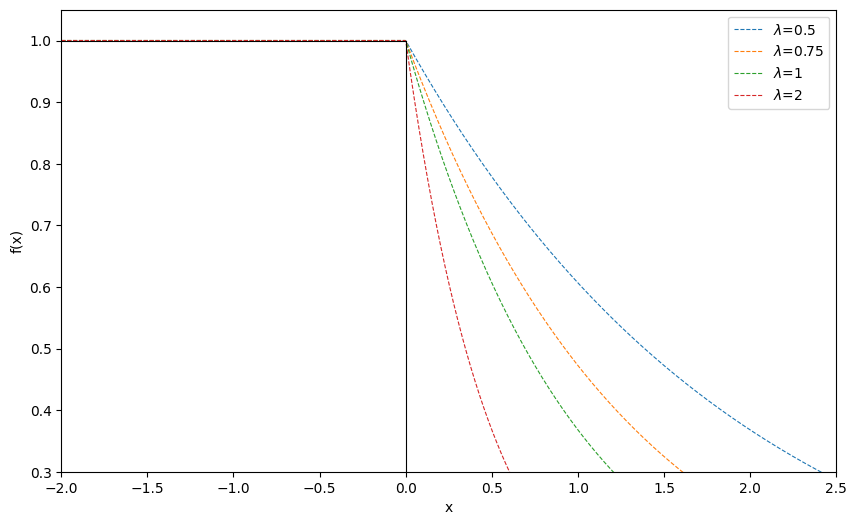

In [107]:
lams = [0.5, 0.75, 1, 2]

for i, lam in enumerate(lams):
        plt.plot(np.linspace(-2,3,1000), example(np.linspace(-2,3,1000), lam),
                 label = fr"$\lambda$={lams[i]}",
                 ls="dashed",
                lw=0.8)
        
plt.plot(np.linspace(-2,0,100), np.ones(100), color="black", lw=0.8)
plt.vlines(0, 0, 1, colors="black", lw=0.8)         

plt.xlabel("x")
plt.ylabel("f(x)")
plt.ylim((0.3,1.05))
plt.xlim((-2,2.5))
plt.legend()
# plt.grid()
plt.rcParams["figure.figsize"] = (10,6)

plt.savefig("LipschitzExample.png", dpi=300, pad_inches=0.05)

### Beta smooth and alpha strong convexity

Text(0.5, 0, 's')

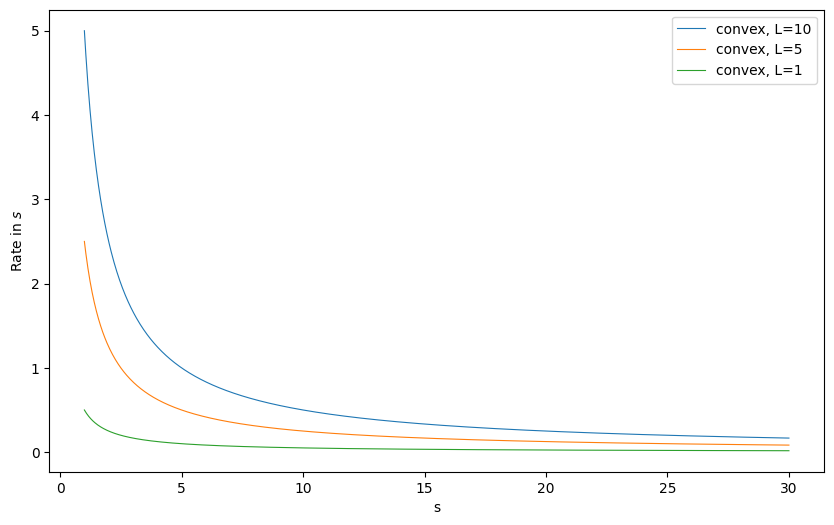

In [126]:
s = np.linspace(1, 30, 1000)
Ls = [10, 5, 1]

for l in Ls:
    plt.plot(s, l/(2*s), label=fr"convex, L={l}", lw=0.8)

plt.legend()
plt.ylabel(r"Rate in $s$")
plt.xlabel("s")



Text(0.5, 0, 's')

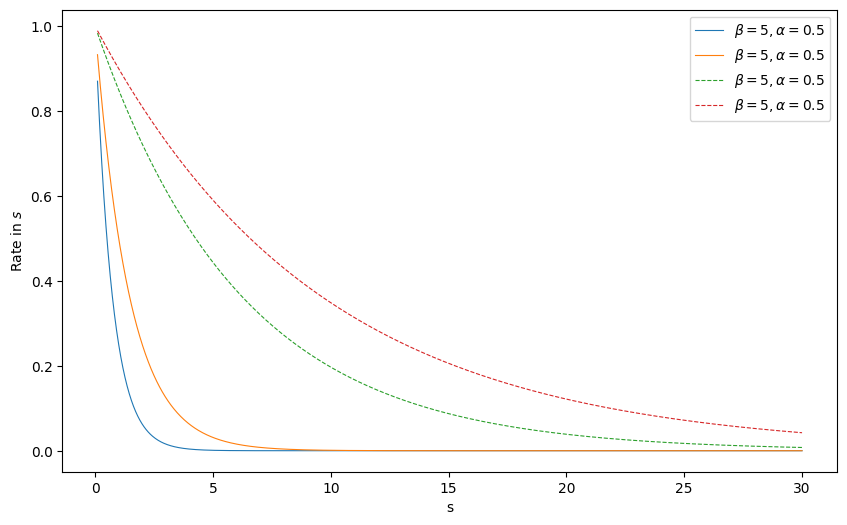

In [121]:
s = np.linspace(0.1, 30, 1000)
Ls = [1, 5]
Ms = [0.75, 0.5]

plt.plot(s, (1-(0.75/1))**s, label=fr"$\beta={l}, \alpha={m}$", lw=0.8)
plt.plot(s, (1-(0.5/1))**s, label=fr"$\beta={l}, \alpha={m}$", lw=0.8)
plt.plot(s, (1-(0.75/5))**s, label=fr"$\beta={l}, \alpha={m}$", lw=0.8, ls="dashed")
plt.plot(s, (1-(0.5/5))**s, label=fr"$\beta={l}, \alpha={m}$", lw=0.8, ls="dashed")
        

plt.legend()
plt.ylabel(r"Rate in $s$")
plt.xlabel("s")


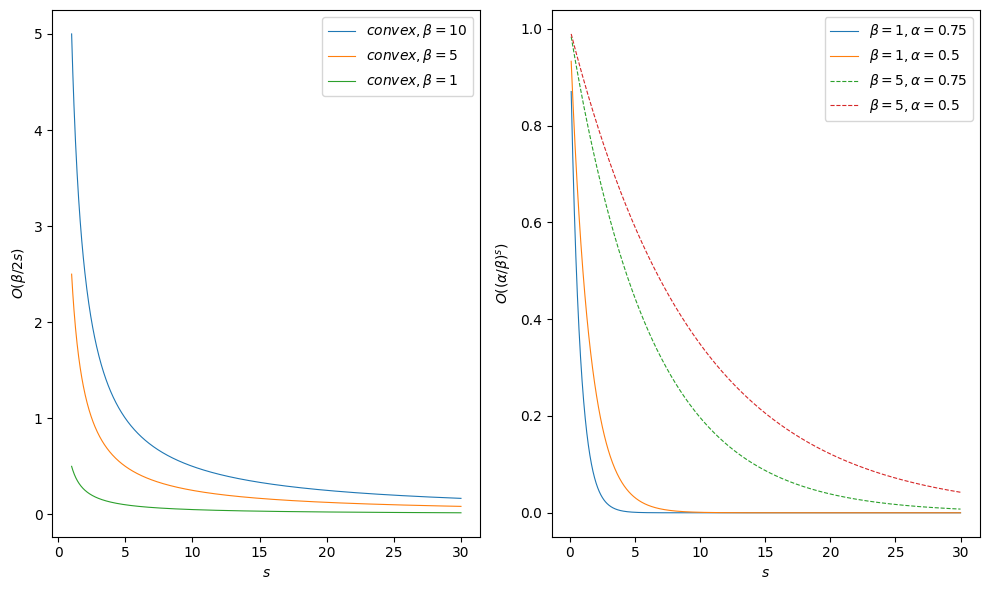

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 6))

s = np.linspace(1, 30, 1000)
Ls = [10, 5, 1]

for l in Ls:
    ax1.plot(s, l/(2*s), label=fr"$convex, \beta={l}$", lw=0.8)

ax1.set(xlabel=r"$s$", ylabel=r"$O\left(\beta/2s \right)$") #, ylabel=r"$f(x-1/\beta\cdot \nabla f(x))-f(x)$")
ax1.legend()

s = np.linspace(0.1, 30, 1000)

ax2.plot(s, (1-(0.75/1))**s, label=fr"$\beta={1}, \alpha={0.75}$", lw=0.8)
ax2.plot(s, (1-(0.5/1))**s, label=fr"$\beta={1}, \alpha={0.5}$", lw=0.8)
ax2.plot(s, (1-(0.75/5))**s, label=fr"$\beta={5}, \alpha={0.75}$", lw=0.8, ls="dashed")
ax2.plot(s, (1-(0.5/5))**s, label=fr"$\beta={5}, \alpha={0.5}$", lw=0.8, ls="dashed")
        
ax2.set(xlabel=r"$s$", ylabel=r"$O\left(\left(\alpha/\beta\right)^{s} \right)$") #, ylabel=r"$f(x-1/\beta\cdot \nabla f(x))-f(x)$")
ax2.legend()

fig.tight_layout()
fig.savefig("LipschitzandStronglyConvexConvergence.png", dpi=300)

### Bregman Divergence for Negative Entropy

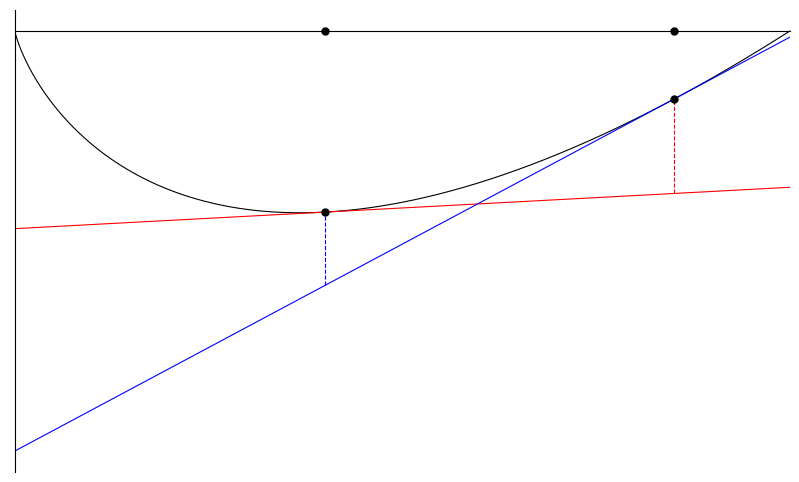

In [139]:
x = np.linspace(0.00001, 1, 1000)
negent = lambda x: x*np.log(x)

# Plot Negent
plt.plot(x, negent(x), color="black", lw=0.8)

# Plot tangent line at y
plt.plot(x, (np.log(0.4)+1)*(x-0.4) + negent(0.4), color="red", lw=0.8)
# Plot Bregman divergence B(x,y)
plt.vlines(0.85, (np.log(0.4)+1)*(0.85-0.4) + negent(0.4), negent(0.85), color="red", lw=0.8, ls="--")


# Plot tangent line at x
plt.plot(x, (np.log(0.85)+1)*(x-0.85) + negent(0.85), color="blue", lw=0.8)
# Plot Bregman divergence B(y,x)
plt.vlines(0.4, (np.log(0.85)+1)*(0.4-0.85) + negent(0.85), negent(0.4), color="blue", lw=0.8, ls="--")



# Plot dots
plt.plot(0.4, 0, 'ko', markersize=5) # y on x-axis
plt.plot(0.4, negent(0.4), 'ko', markersize=5) # y on negent line
plt.plot(0.85, negent(0.85), 'ko', markersize=5) # x on negent line
plt.plot(0.85, 0, 'ko', markersize=5) # x on x-axis


# Visual editing
plt.xticks([])
plt.yticks([])

# Get the current axes
ax = plt.gca()

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlim(0, 1)

# Make the left spine invisible
#ax.spines['left'].set_visible(False)

ax.spines['bottom'].set_position(('data', 0))

plt.rcParams["figure.figsize"] = (10,6)

plt.savefig("BregmanDivergence1.png", dpi=300)